In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df=pd.read_csv('weight-height.csv')

In [84]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [85]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Text(0, 0.5, 'height')

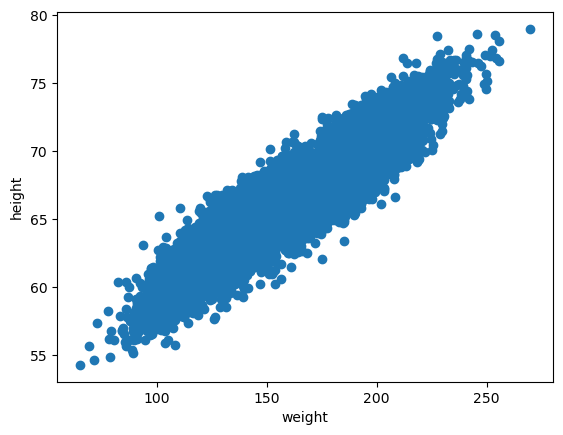

In [87]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [88]:
#divide the dataset into dependent features and independent 

In [89]:
x=df[['Weight']]
y=df['Height']

In [90]:
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [91]:
x.shape

(10000, 1)

In [92]:
y.shape

(10000,)

In [93]:
#divide the dataset into train and test


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler


In [97]:
scaler=StandardScaler()

In [98]:
X_train=scaler.fit_transform(X_train)

In [99]:
X_train

array([[-1.26850469],
       [ 1.49950187],
       [ 1.23435095],
       ...,
       [-0.14126217],
       [ 0.56364485],
       [-0.34162408]])

In [100]:
X_test=scaler.transform(X_test)

In [101]:
X_test

array([[ 0.36793009],
       [ 1.05598138],
       [ 0.27747375],
       ...,
       [-1.1281409 ],
       [ 0.81914676],
       [-1.83691726]])

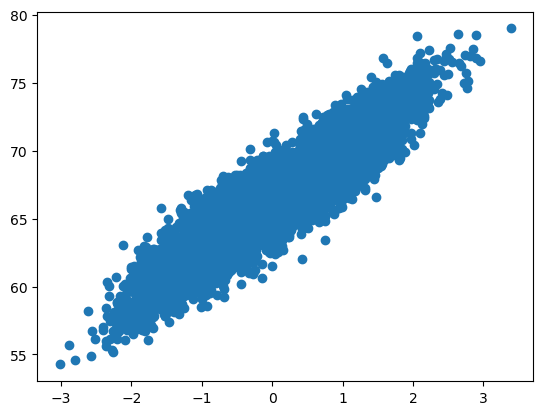

In [102]:
plt.scatter(X_train,y_train) 

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
regressor=LinearRegression()

In [105]:
#training the data set

In [106]:
regressor.fit(X_train,y_train)

LinearRegression()

In [107]:
regressor.intercept_

66.3596814074891

In [108]:
regressor.coef_

array([3.55479288])

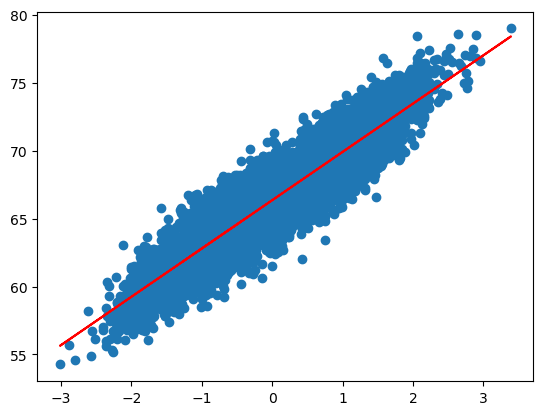

In [109]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [110]:
#prediction for test data set 

In [111]:
y_predict_test=regressor.predict(X_test)

In [112]:
y_predict_test

array([67.66759668, 70.11347651, 67.34604311, ..., 62.34937415,
       69.27157847, 59.829821  ])

In [113]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
6412    65.748601
8285    60.731857
7853    62.188933
1095    67.068304
6929    58.632720
Name: Height, Length: 2000, dtype: float64

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [115]:
mse=mean_squared_error(y_test,y_predict_test)

In [116]:
mae=mean_absolute_error(y_test,y_predict_test)

In [117]:
print(mse)
print(mae)

2.112361948474147
1.1588656330992093


# multiple linear regression 

In [118]:
from sklearn.datasets import fetch_california_housing

In [119]:
california=fetch_california_housing()

In [120]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [121]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [122]:
california.target_names

['MedHouseVal']

In [123]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [124]:
# creating the dataframe using the dataset 

In [125]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [126]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [127]:
dataset['Price']=california.target

In [128]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [129]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [131]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [132]:
import seaborn as sns 

<Axes: >

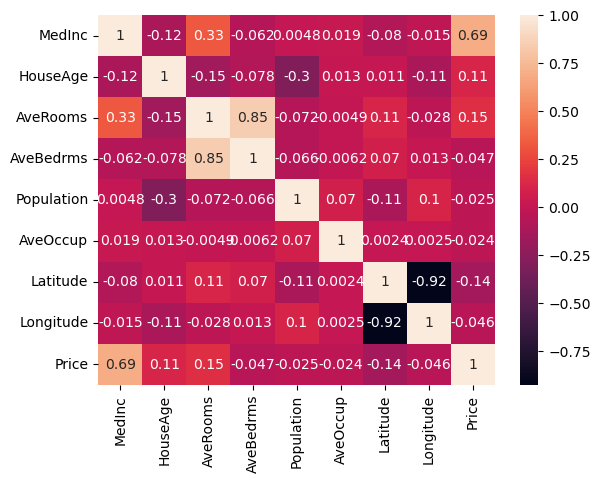

In [133]:
sns.heatmap(dataset.corr(),annot=True)

In [134]:
#divide the independent and dependent 

In [135]:
x=dataset.iloc[:,:-1]

In [136]:
y=dataset.iloc[:,-1]

In [137]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [138]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [141]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16750,2.4830,44.0,3.714286,1.040816,339.0,3.459184,37.71,-122.46
11962,2.7083,25.0,5.613293,1.105740,1311.0,3.960725,34.01,-117.40
758,3.8750,21.0,4.828215,1.120921,2461.0,2.361804,37.66,-122.07
17451,4.9292,17.0,6.802885,1.033654,1035.0,2.487981,34.71,-120.46
17018,6.8787,38.0,6.125203,0.980488,1455.0,2.365854,37.52,-122.29
...,...,...,...,...,...,...,...,...
9372,4.1250,37.0,5.109792,1.044510,648.0,1.922849,37.93,-122.53
7291,1.2059,18.0,2.537037,1.089744,1913.0,2.725071,33.98,-118.22
17728,5.5336,6.0,4.905336,0.965577,2160.0,3.717728,37.32,-121.79
7293,2.2059,35.0,2.748491,0.997988,2160.0,4.346076,33.98,-118.23


In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler=StandardScaler()

In [144]:
X_train_scaled=scaler.fit_transform(X_train)

In [145]:
X_test_scaled=scaler.transform(X_test)

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
reg=LinearRegression()

In [148]:
reg


LinearRegression()

In [149]:
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [150]:
reg.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [151]:
reg.intercept_

2.0634768086491184

In [152]:
y_pred=reg.predict(X_test_scaled)

In [153]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [154]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: Price, Length: 6812, dtype: float64

In [155]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [156]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.537105694300796
0.5522332399363619


In [157]:
#Accuracy

In [158]:
from sklearn.metrics import r2_score

In [159]:
score=r2_score(y_test,y_pred)

In [160]:
score

0.593595852643664

# Adjusted r square

In [161]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5931179409607519

In [162]:
df= pd.read_csv('Algerian_forest_fires_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Algerian_forest_fires_dataset.csv'

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
#adding new colums

In [ ]:
df.loc[:122,"Region"]=0
df.loc[122:, "Region"]=1

In [ ]:
df

In [ ]:
df[['Region']]=df[['Region']].astype(int)  #convert the float to int

In [ ]:
df

In [169]:
# remove the null  values 

In [170]:
df=df.dropna().reset_index(drop=True)

In [171]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [172]:
df=df.drop(122).reset_index(drop=True)

In [173]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9994,Female,66.172652,136.777454
9995,Female,67.067155,170.867906
9996,Female,63.867992,128.475319
9997,Female,69.034243,163.852461


In [174]:
df.shape

(9999, 3)

In [175]:
# remove the extra space

In [176]:
df.colums=df.columns.str.strip()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14748\3071193702.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums=df.columns.str.strip()


In [177]:
df.colums

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9999 non-null   object 
 1   Height  9999 non-null   float64
 2   Weight  9999 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [179]:
df[['month','day','year','Temperature']]=df[['month','day','year','Temperature']].astype(int)

KeyError: "None of [Index(['month', 'day', 'year', 'Temperature'], dtype='object')] are in the [columns]"

In [ ]:
df.info()

In [180]:
df[['FFMC','DMC','DC','ISI','BUI','FWI']]=df[['FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

KeyError: "None of [Index(['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')] are in the [columns]"

In [ ]:
df.info()

In [181]:
df.copy=df.drop(['day','month','year'],axis=1)

KeyError: "['day', 'month', 'year'] not found in axis"

In [ ]:
df.copy

In [ ]:
#convert the categorical into int 

In [182]:
df.copy['Classes']=np.where(df.copy['Classes'].str.contains('not fire'),0,1)  #not fire to 0 other wise 1

TypeError: 'method' object is not subscriptable

In [183]:
df.copy.to_csv('alegrian_foresr.csv',index=False)

AttributeError: 'function' object has no attribute 'to_csv'

In [184]:
plt.style.use('seaborn')
df.copy.hist(bins=50,figsize=(20,15))
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14748\1049797873.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


AttributeError: 'function' object has no attribute 'hist'

In [185]:
df=pd.read_csv('cleaned_algerian_forest_fires.csv')

In [186]:
df.loc[:122,"Region"]=0
df.loc[122:, "Region"]=1

In [187]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [188]:
df[['Region']]=df[['Region']].astype(int)

In [189]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [190]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [191]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.228279,4.774180,16.664754,7.006557,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.672572,4.175318,14.204824,7.438889,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,10.475000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(1), int64(7)
memory usage: 27.8 KB


In [193]:
# independent and dependent features

In [194]:
X=df.drop('FWI',axis=1)

In [195]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [196]:
y=df['FWI']

In [197]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [198]:
#train and test split

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train,X_test,y_tarin,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [205]:
X_train.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
58,29,7,2012,32,73,15,0.0,86.6,26.7,127.0,5.6,35.0,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
68,8,8,2012,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
184,2,8,2012,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,1,1


In [207]:
y_train.head()

16750    2.143
11962    0.878
758      1.793
17451    2.072
17018    3.868
Name: Price, dtype: float64

In [208]:
X_test.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0,1
60,31,7,2012,35,64,17,0.0,87.2,31.9,145.7,6.8,41.2,1,0
61,1,8,2012,36,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0,0
63,3,8,2012,35,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0,0
69,9,8,2012,35,59,17,0.0,87.4,14.8,57.0,6.9,17.9,1,0


In [209]:
y_test.head()

162     0.8
60     15.7
61      0.9
63      0.8
69      9.9
Name: FWI, dtype: float64

In [210]:
X_train.shape

(183, 14)

In [211]:
X_test.shape

(61, 14)

In [212]:
y_tarin.shape

(183,)

In [213]:
y_test.shape

(61,)

In [214]:
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
day,1.000000,0.072755,NaN,0.128081,-0.128703,0.008807,-0.230040,0.287309,0.508445,0.543485,0.200518,0.532016,0.205940,0.052383
month,0.072755,1.000000,NaN,0.027700,-0.116593,-0.115608,-0.025454,0.155819,0.153032,0.200202,0.162354,0.168453,0.154849,0.022166
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.128081,0.027700,NaN,1.000000,-0.620160,-0.292643,-0.391780,0.667805,0.459940,0.366012,0.600496,0.437836,0.520961,0.257925
RH,-0.128703,-0.116593,NaN,-0.620160,1.000000,0.263391,0.241248,-0.633029,-0.386025,-0.214661,-0.680848,-0.333190,-0.428274,-0.407969
Ws,0.008807,-0.115608,NaN,-0.292643,0.263391,1.000000,0.110214,-0.164087,-0.004448,0.065566,0.003653,0.024460,-0.066316,-0.217869
Rain,-0.230040,-0.025454,NaN,-0.391780,0.241248,0.110214,1.000000,-0.606500,-0.319853,-0.309199,-0.364722,-0.326064,-0.393743,-0.040920
FFMC,0.287309,0.155819,NaN,0.667805,-0.633029,-0.164087,-0.606500,1.000000,0.598285,0.507218,0.734376,0.586956,0.757892,0.225303
DMC,0.508445,0.153032,NaN,0.459940,-0.386025,-0.004448,-0.319853,0.598285,1.000000,0.888428,0.674481,0.983556,0.590496,0.178564
DC,0.543485,0.200202,NaN,0.366012,-0.214661,0.065566,-0.309199,0.507218,0.888428,1.000000,0.507468,0.946317,0.500250,-0.092346


In [218]:
def correaltion(dataset,threshold):
    col_corr=set()
    corr_mat=dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname=corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [219]:
corr_feature=correaltion(X_train,0.85)

In [223]:
corr_feature

{'BUI', 'DC'}

In [225]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)

In [226]:
X_train.shape

(183, 12)

In [227]:
X_test.shape

(61, 12)

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler=StandardScaler()

In [230]:
scaler

StandardScaler()

In [231]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [234]:
X_train_scaled

array([[ 1.59683086, -0.44085878,  0.        , ...,  0.23313171,
         0.95197164, -1.01653005],
       [-1.56040855, -1.33727163,  0.        , ..., -0.86385137,
        -1.05045146, -1.01653005],
       [-1.44347376, -1.33727163,  0.        , ..., -1.03078358,
        -1.05045146, -1.01653005],
       ...,
       [-0.04025624,  1.35196693,  0.        , ...,  0.54314867,
         0.95197164,  0.98373875],
       [-1.32653897, -1.33727163,  0.        , ..., -0.57768187,
        -1.05045146,  0.98373875],
       [-0.62493021, -1.33727163,  0.        , ..., -0.792309  ,
        -1.05045146, -1.01653005]])

In [235]:
X_test_scaled

array([[-5.07995413e-01, -4.40858780e-01,  0.00000000e+00,
         5.53431823e-01, -4.05626369e-01, -1.37528414e-01,
         1.21063854e+00, -1.74710012e-01, -5.93001848e-01,
        -7.20766621e-01, -1.05045146e+00,  9.83738754e-01],
       [ 1.83070045e+00, -4.40858780e-01,  0.00000000e+00,
         8.29393740e-01,  1.26485642e-01,  5.42679688e-01,
        -4.09754584e-01,  6.80265101e-01,  1.31841831e+00,
         5.19301209e-01,  9.51971638e-01, -1.01653005e+00],
       [-1.67734335e+00,  4.55554073e-01,  0.00000000e+00,
         1.10535566e+00, -1.13728038e+00, -4.77632465e-01,
        -4.09754584e-01,  1.01088411e-01, -7.70270654e-01,
        -6.25376788e-01, -1.05045146e+00, -1.01653005e+00],
       [-1.44347376e+00,  4.55554073e-01,  0.00000000e+00,
         8.29393740e-01,  5.99716406e-02, -4.77632465e-01,
        -2.42127709e-01, -5.06007217e-02, -7.00904600e-01,
        -6.96919163e-01, -1.05045146e+00, -1.01653005e+00],
       [-7.41865000e-01,  4.55554073e-01,  0.0000000

# Linear

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
Lin=LinearRegression()

In [238]:
Lin

LinearRegression()

In [241]:
Lin.fit(X_train_scaled,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [183, 13828]

In [242]:
y_pred=Lin.predict(X_test_scaled)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [243]:
from sklearn.metrics import mean_absolute_error

In [244]:
mae=mean_absolute_error(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [61, 6812]

In [245]:
from sklearn.metrics import r2_score

In [246]:
score=r2_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [61, 6812]

# Lasso 

In [248]:
from sklearn.linear_model import Lasso

In [249]:
lasso=Lasso()

In [250]:
lasso.fit(X_train_scaled,y_tarin)

Lasso()

In [252]:
y_pred=lasso.predict(X_test_scaled)

In [253]:
y_pred

array([ 2.2798974 , 12.92059019,  2.06032061,  2.02146513,  8.78876668,
       17.45761741, 12.05214197,  6.59181411,  4.23878763,  6.69603296,
       12.13973576,  0.5621624 ,  9.82865762,  0.82059467,  4.25050708,
        6.99085597,  3.90510914, -0.22052865, 18.46479085, 15.46603357,
        5.69932273, 14.51803777, 12.46662428,  9.29514414, 18.3136703 ,
        1.956706  ,  4.45836442,  2.45382875,  0.11314984, 10.25548751,
        0.2247868 , -0.55420713,  7.14504551,  2.84980162,  7.59715093,
        1.59156626,  0.75830028,  3.87241551, -0.46724146, 12.17982361,
       13.17962671, 13.33690911, 15.28035889,  3.09218921, 12.97423411,
       10.16110374,  1.8049812 ,  9.46351788, 11.25033725,  0.82182704,
        2.95218386,  6.12243163, 20.51129875,  3.26365581,  6.3808639 ,
        1.23075174, 10.07416195, 16.02235784,  5.68453429,  9.88785915,
        4.60639211])

In [254]:
y_test

162     0.8
60     15.7
61      0.9
63      0.8
69      9.9
       ... 
201     7.7
149    18.4
175     2.5
226    10.3
49      4.0
Name: FWI, Length: 61, dtype: float64

In [255]:
from sklearn.metrics import mean_absolute_error

In [256]:
mae=mean_absolute_error(y_test,y_pred)

In [257]:
mae

1.2413565873709245

In [258]:
from sklearn.metrics import r2_score

In [259]:
score=r2_score(y_test,y_pred)

In [260]:
score

0.9389882446596667

# Ridge 

In [261]:
from sklearn.linear_model import Ridge


In [262]:
R=Ridge()

In [265]:
R.fit(X_train_scaled,y_tarin)

Ridge()

In [266]:
y_pred=R.predict(X_test_scaled)

In [267]:
y_pred

array([ 0.6154131 , 14.57953844,  0.93619876,  0.84874134,  9.54177878,
       19.99483978, 13.51422193,  6.69701128,  4.29809818,  6.95409281,
       12.78045268,  0.13484883, 10.21189916, -0.51199967,  3.91754106,
        6.51494122,  2.90763129,  0.10462805, 20.12751845, 16.66597264,
        5.84924264, 15.74985512, 13.97898062,  9.25292566, 19.95512315,
        0.15633374,  4.7599582 ,  1.89557968,  0.35660457, 11.36235325,
        0.57031244, -1.32131894,  7.45582167,  1.25246501,  8.17034974,
       -0.35943872,  0.07658568,  3.08751768, -0.42192857, 13.67735679,
       14.75871137, 14.19742991, 16.4142228 ,  2.06539443, 13.67755776,
       11.16492849,  2.77673458,  9.47632624, 11.61437876, -0.34345849,
        2.71382275,  6.42846539, 22.81281327,  2.95854161,  6.84871598,
        0.33050715, 10.46573821, 17.35361598,  4.75689734, 10.25882708,
        4.83649977])

In [268]:
mae=mean_absolute_error(y_test,y_pred)

In [269]:
mae

0.750634877148862

In [270]:
score=r2_score(y_test,y_pred)

In [271]:
score

0.9764690403333587

# Elastic net reg

In [273]:
from sklearn.linear_model import ElasticNet

In [274]:
El=ElasticNet()

In [275]:
El.fit(X_train_scaled,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [183, 13828]

In [276]:
y_pred=El.predict(X_test_scaled)

NotFittedError: This ElasticNet instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [277]:
mae=mean_absolute_error(y_test,y_pred)

In [278]:
mae

0.750634877148862

In [279]:
score=r2_score(y_test,y_pred)

In [280]:
score

0.9764690403333587

In [281]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(R,open('ridge.pkl','wb'))

# Logistic Regression Implementation

In [2]:
from sklearn.datasets import load_iris

In [5]:
dataset=load_iris()

In [9]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
import numpy as np
import pandas as pd

In [16]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [17]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df['target']=dataset.target

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
##Binary classification

df_copy=df[df['target']!=2]  # jaha par bhi value 2 hai us ko nahi lena hai 

In [24]:
df_copy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


In [26]:
df_copy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [28]:
X=df_copy.iloc[:,:-1]

In [29]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y=df_copy.iloc[:,-1]

In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
X_test.shape

(20, 4)

In [41]:
X_train.shape

(80, 4)

In [42]:
y_train.shape

(80,)

In [43]:
y_test.shape

(20,)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
Logistic=LogisticRegression()

In [46]:
Logistic.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred=Logistic.predict(X_test)

In [48]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [49]:
y_test

83    1
53    1
70    1
45    0
44    0
39    0
22    0
80    1
10    0
0     0
18    0
30    0
73    1
33    0
90    1
4     0
76    1
77    1
12    0
31    0
Name: target, dtype: int32

# Confusion matrix,accuracy score,classification report

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [52]:
print(confusion_matrix(y_pred,y_test))

[[12  0]
 [ 0  8]]


In [53]:
print(accuracy_score(y_pred,y_test))

1.0


In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Hyperparameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [57]:
parameters={'penalty':('l1','l2','elasticnet',None),
           'C':[1,10,20]}

In [58]:
clf=GridSearchCV(Logistic,param_grid=parameters,cv=5)

In [60]:
clf.fit(X_train,y_train)  #data will be divide into 2 part (i)validation,(ii)train

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [61]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[12  0]
 [ 0  8]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
parameters={'penalty':('l1','l2','elasticnet',None),
           'C':[1,10,20]}

In [65]:
clff=RandomizedSearchCV(Logistic,param_distributions=parameters,)

In [66]:
clff.fit(X_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20],
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None)})

In [69]:
clff.best_params_

{'penalty': None, 'C': 10}

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[12  0]
 [ 0  8]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Logistic Reg for multiclass classification

In [71]:
from sklearn.datasets import make_classification

In [72]:
X,y=make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,n_classes=3,random_state=1)

In [74]:
y

array([1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1,

In [75]:
X

array([[ 1.89149379, -0.39847585,  1.63856893, ...,  0.58810926,
        -0.02542177, -0.52835426],
       [ 1.86913773, -0.56336215,  2.03411807, ..., -0.55633   ,
        -0.27340013,  0.72129251],
       [ 1.95259701, -2.83144572,  0.19055535, ..., -0.60957741,
        -2.07750191, -1.75469982],
       ...,
       [ 1.98033054,  1.37228804,  1.67376262, ...,  2.75687956,
        -0.20719842,  0.39299534],
       [-1.54305631, -0.27530218,  0.38744703, ...,  0.72769107,
         0.51983329, -1.92306657],
       [ 1.17970389, -3.3812155 , -0.1498426 , ...,  1.24640268,
        -4.00356845, -3.01027048]])

In [83]:
from sklearn.linear_model import LogisticRegression

In [85]:
model=LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_tarin,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [90]:
X_train

array([[ 1.6996658 ,  0.02538366, -0.83658787, ...,  1.29475227,
        -1.26056   ,  0.01001085],
       [-0.31809179, -1.59708983, -0.93941637, ..., -0.24399802,
        -1.14087195, -1.63577652],
       [-1.44568641,  2.35090243, -1.68992829, ..., -0.4410931 ,
         2.94617139,  0.94890677],
       ...,
       [ 1.2434607 , -0.27522163,  1.97095622, ...,  0.96076894,
         0.58347265, -1.33630592],
       [ 2.11062445, -1.23160993,  3.58634974, ...,  0.24849966,
        -1.53366403,  0.36672816],
       [ 1.27331564, -1.15457689, -0.52564804, ...,  0.73643409,
        -1.87397626, -0.81899342]])

In [92]:
model.fit(X_train,y_tarin)

LogisticRegression(multi_class='multinomial')

In [93]:
y_pred=model.predict(X_test)

In [94]:
y_pred

array([1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       1, 0])

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print("---")
print(accuracy_score(y_pred,y_test))
print("--==")
print(classification_report(y_pred,y_test))

[[57 13 16]
 [15 39  6]
 [ 3 12 39]]
---
0.675
--==
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        86
           1       0.61      0.65      0.63        60
           2       0.64      0.72      0.68        54

    accuracy                           0.68       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.68      0.68      0.68       200



# Decision Tree Regressor

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import fetch_california_housing

In [7]:
df_cali=fetch_california_housing()

In [12]:
df=pd.DataFrame(df_cali.data,columns=df_cali.feature_names)

In [13]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
df['target']=df_cali.target

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
X=df.iloc[:,:-1]

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
y=df.iloc[:,-1]

In [19]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
X_train.shape

(16512, 8)

In [41]:
X_test.shape

(4128, 8)

In [42]:
y_train.shape

(16512,)

In [43]:
y_test.shape

(4128,)

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
regressor=DecisionTreeRegressor()

In [46]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [47]:
y_pred=regressor.predict(X_test)

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2=r2_score(y_pred,y_test)

In [59]:
r2

0.626828868429048

In [51]:
#hypertuning
parameter={'criterion':['squared_error','friedman_mse','absolute_error'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
          'max_features':['auto','sqrt','log2']}

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
clf=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [65]:
clf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [66]:
clf.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 12,
 'max_features': 'log2',
 'splitter': 'best'}

In [67]:
y_pred=clf.predict(X_test)

In [68]:
r2=r2_score(y_pred,y_test)

In [69]:
r2

0.6701978719228274

# Decision Tree Classifier implementation With Post purnning 

In [70]:
from sklearn.datasets import load_iris

In [71]:
dataset=load_iris()

In [72]:
import seaborn as sns 

In [73]:
df=sns.load_dataset('iris')

In [74]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
X=df.iloc[:,:-1]

In [76]:
y=df.iloc[:,-1]

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=23)

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
classifier=DecisionTreeClassifier()

In [81]:
classifier

DecisionTreeClassifier()

In [82]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.85\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.7\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.7, 0.4166666666666667, 'x[2] <= 5.35\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.6, 0.25, 'x[1] <= 2.35\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.7, 0.

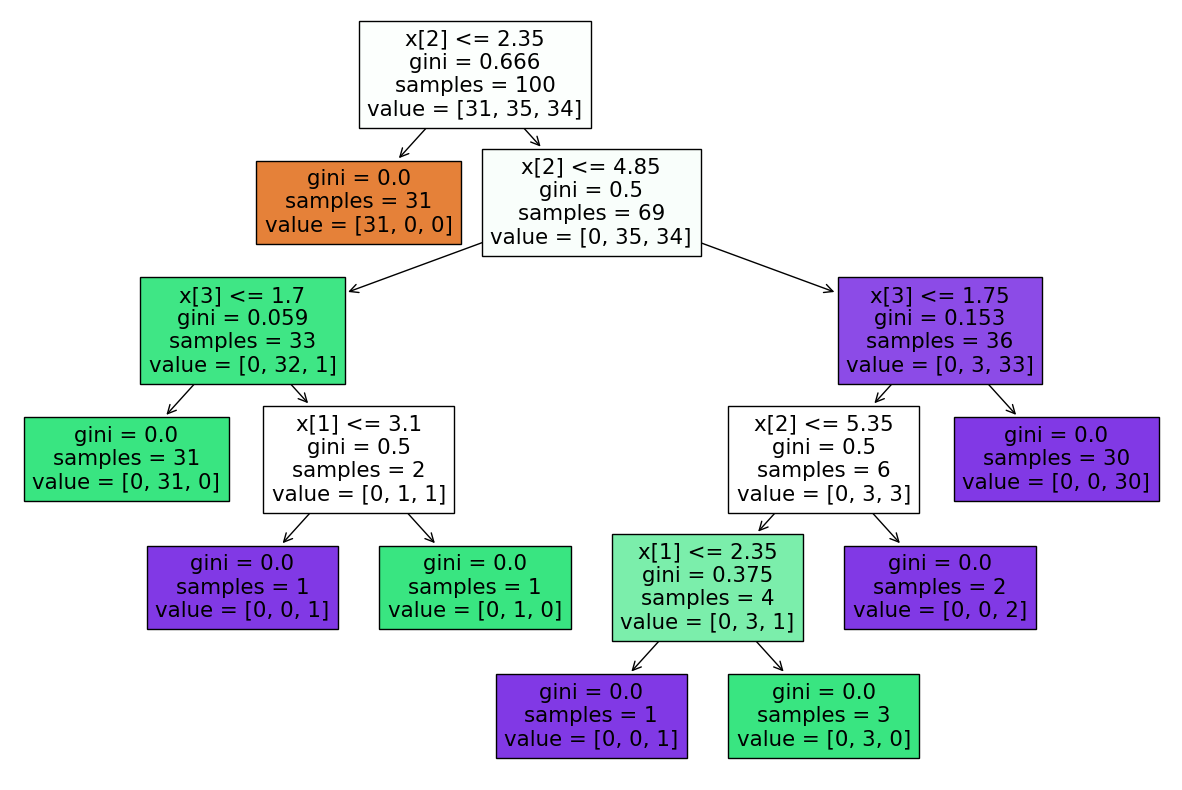

In [85]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [87]:
#post pruning 

classifier=DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.85\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 3, 33]')]

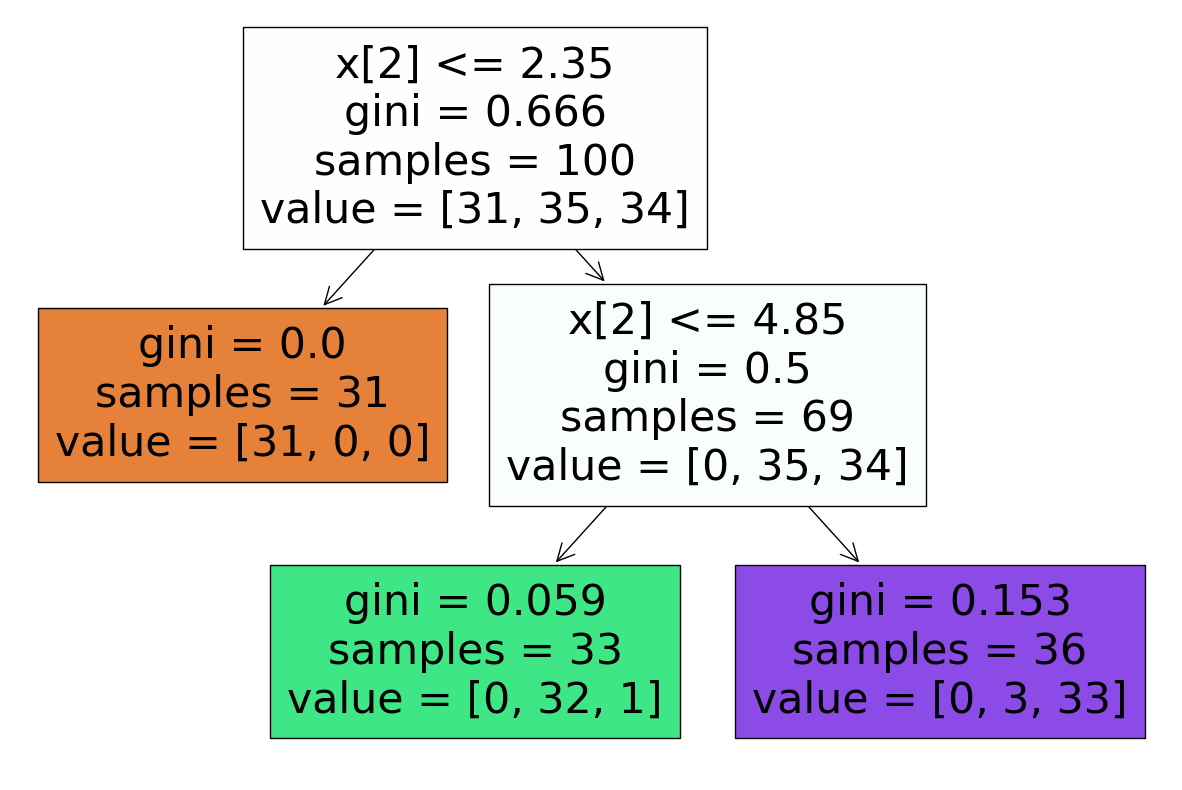

In [88]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [89]:
y_pred=classifier.predict(X_test)

In [90]:
y_pred

array(['virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor'], dtype=object)

In [91]:
y_test

139     virginica
125     virginica
67     versicolor
3          setosa
113     virginica
52     versicolor
18         setosa
137     virginica
20         setosa
64     versicolor
73     versicolor
30         setosa
102     virginica
19         setosa
10         setosa
133     virginica
51     versicolor
63     versicolor
135     virginica
28         setosa
115     virginica
45         setosa
46         setosa
2          setosa
140     virginica
17         setosa
44         setosa
126     virginica
75     versicolor
69     versicolor
9          setosa
59     versicolor
16         setosa
122     virginica
7          setosa
5          setosa
54     versicolor
93     versicolor
95     versicolor
100     virginica
120     virginica
24         setosa
81     versicolor
47         setosa
87     versicolor
146     virginica
106     virginica
131     virginica
34         setosa
99     versicolor
Name: species, dtype: object

In [92]:
from sklearn.metrics import accuracy_score,classification_report

In [94]:
print(accuracy_score(y_pred,y_test))

0.94


In [95]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      0.88      0.90        16
   virginica       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



# Decision Tree Classifier implementation With Pre-purnning

In [110]:
parameter={'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5],
          'max_features':['auto','sqrt','log2']}

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [119]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [120]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.85\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 3, 33]')]

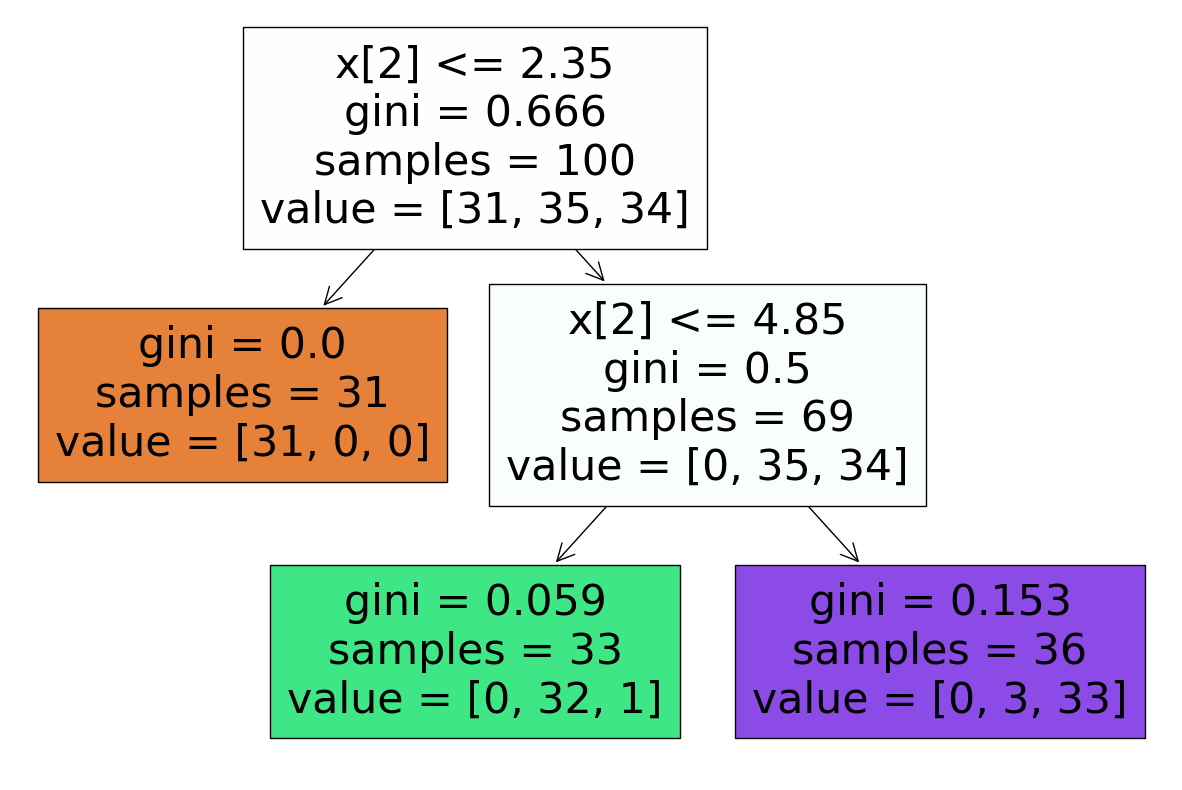

In [121]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [122]:
y_pred=clf.predict(X_test)

In [123]:
print(accuracy_score(y_pred,y_test))

0.98


In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# SVM(Support Vector machine )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [5]:
X

array([[-1.39204452,  1.68930256],
       [ 1.02431789, -0.75805445],
       [-1.13611256,  1.22456216],
       ...,
       [-0.8678656 ,  0.48013447],
       [ 1.02327042,  1.45087256],
       [ 1.58718454,  0.40261167]])

In [6]:
y

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [7]:
pd.DataFrame(X)

,0,1
0,-1.392045,1.689303
1,1.024318,-0.758054
2,-1.136113,1.224562
3,-2.283411,2.469689
4,-0.618046,0.468997
...,...,...
995,-1.470503,-0.990207
996,-1.547814,-0.865084
997,-0.867866,0.480134
998,1.023270,1.450873


<Axes: xlabel='0', ylabel='1'>

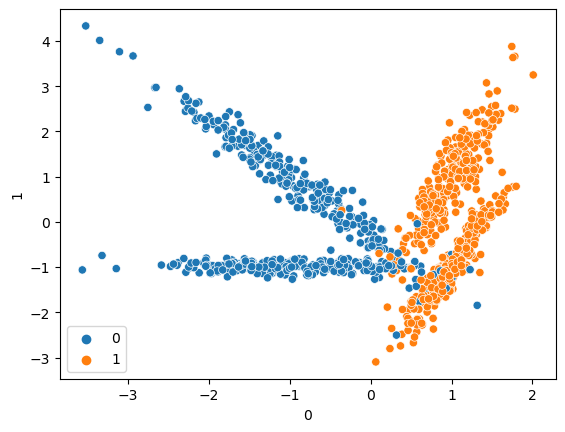

In [12]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
from sklearn.svm import SVC

In [18]:
svc=SVC(kernel='linear')

In [20]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [21]:
svc.coef_

array([[ 3.42787664, -0.16571815]])

In [23]:
y_pred=svc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [27]:
print(classification_report(y_pred,y_test))
print("___----")
print(accuracy_score(y_pred,y_test))
print("----")
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       123
           1       0.98      0.97      0.98       127

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

___----
0.976
----
[[121   2]
 [  4 123]]


In [28]:
#hyperperameter tuning 

In [29]:
parameter={'C':[0,1,2,3,10,100,1000],
          'gamma':[1,0,0.1,0.001,2],
          'kernel':['linear']}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
clf=GridSearchCV(SVC(),param_grid=parameter,refit=True,cv=5,verbose=3)

In [32]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END .........C=0, gamma=0, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=0, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .........C=0, gamma=0, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .........C=0, gamma=0, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .........C=0, gamma=0, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=0.1, kernel=line

[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.973 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=10, gamma=2, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/5] END ......C=10, gamma=2, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END ......C=10, gamma=2, kernel=linear;, score=0.973 total time=   0.0s
[CV 4/5] END ......C=10, gam

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Asus\anaconda3\Lib\site-packages\skle

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 10, 100, 1000],
                         'gamma': [1, 0, 0.1, 0.001, 2], 'kernel': ['linear']},
             verbose=3)

In [38]:
clf.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [39]:
y_pred=clf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [41]:
print(classification_report(y_pred,y_test))
print("___----")
print(accuracy_score(y_pred,y_test))
print("----")
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       123
           1       0.98      0.97      0.98       127

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

___----
0.976
----
[[121   2]
 [  4 123]]


# SVM Regressor 

In [43]:
from sklearn.datasets import make_regression

In [45]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [46]:
pd.DataFrame(X)

,0,1
0,-0.147281,-0.313276
1,0.846475,-0.383000
2,0.451228,0.219129
3,0.116105,0.591288
4,-0.340499,0.854452
...,...,...
995,0.385871,0.435094
996,-0.535978,-0.960820
997,-1.168561,-1.052340
998,1.628637,-0.211913


In [47]:
pd.DataFrame(y)

,0
0,-27.621723
1,-4.602072
2,30.380530
3,50.212262
4,57.386751
...,...
995,47.255827
996,-90.260573
997,-110.871800
998,28.228708


<Axes: xlabel='0', ylabel='1'>

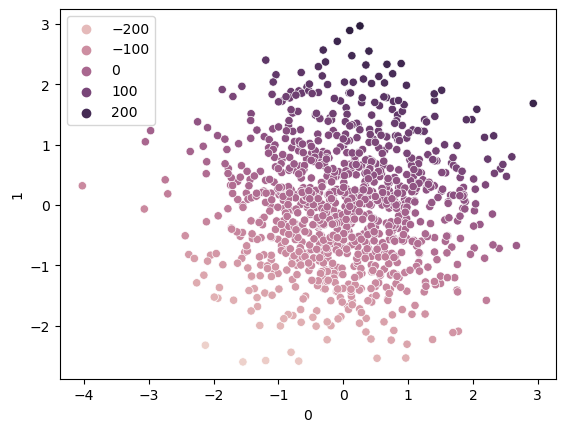

In [48]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [50]:
from sklearn.svm import SVR

In [53]:
svr=SVR(kernel='linear')

In [54]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [55]:
svr.coef_

array([[28.32989069, 80.35432286]])

In [56]:
y_pred=svr.predict(X_test)

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2=r2_score(y_pred,y_test)

In [60]:
r2

0.9985132428813753

In [61]:
#hyperparameter tuning 

In [62]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameter={'C':[0.1,1,10,100,1000],
          'gamma':[1,0.1,.01,.001],
          'kernel':['linear'],
          'epsilon':[0.1,0.2,0.3]}

In [68]:
clf=GridSearchCV(SVR(),param_grid=parameter,cv=5,refit=True,verbose=3)

In [69]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.777 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.797 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.777 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.797 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] EN

[CV 3/5] END C=100, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.1, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.1, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[C

[CV 3/5] END C=1000, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.998 total time=   0.4s
[CV 4/5] END C=1000, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.4s
[CV 5/5] END C=1000, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.4s
[CV 1/5] END C=1000, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.5s
[CV 2/5] END C=1000, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.5s
[CV 3/5] END C=1000, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.3s
[CV 4/5] END C=1000, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 5/5] END C=1000, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 1/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.3s
[CV 2/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.6s
[CV 3/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
             verbose=3)

In [70]:
y_pred=clf.predict(X_test)

In [71]:
clf.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [73]:
r2=r2_score(y_pred,y_test)

In [74]:
r2

0.9985424840614713

# Navie Bayes 

In [75]:
from sklearn.datasets import load_iris

In [80]:
X,y=load_iris(return_X_y=True)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [82]:
from sklearn.naive_bayes import GaussianNB

In [87]:
Gnb=GaussianNB()

In [88]:
Gnb.fit(X_train,y_train)

GaussianNB()

In [89]:
y_pred=Gnb.predict(X_test)

In [90]:
print(classification_report(y_pred,y_test))
print("___----")
print(accuracy_score(y_pred,y_test))
print("----")
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

___----
1.0
----
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# Random forest  classifier  with pipeline and Hyperparameter tuning

In [1]:
import seaborn as sns
df=sns.load_dataset('tips')

In [2]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [5]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [6]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

In [12]:
df['time']=endcoder.fit_transform(df['time'])

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4


In [17]:
X=df.drop(labels=['time'],axis=1)

In [18]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [15]:
X=df.drop(columns=['time'],axis=1)

In [16]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [19]:
y=df['time']

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: time, dtype: int32

In [21]:
y=df.time

In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: time, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Feature Engineering Automation

In [24]:
from sklearn.pipeline import Pipeline

In [26]:
from sklearn.impute import SimpleImputer #Handling missing value 
from sklearn.preprocessing import StandardScaler #Feature scaling
from sklearn.preprocessing import OneHotEncoder #categorical to numerical 
from sklearn.compose import ColumnTransformer

In [38]:
cat_cols=['sex','day','smoker']
numerical_cols=['total_bill','tip','size']

In [39]:
num_pipeline=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

In [40]:
cat_pipeline=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('OneHotEncoder',OneHotEncoder())])

In [41]:
preprocessor=ColumnTransformer([('num_pipeline',num_pipeline,numerical_cols),
                               ('cat_pipeline',cat_pipeline,cat_cols)
                               ])

In [42]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['total_bill', 'tip', 'size']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder())]),
                                 ['sex', 'day', 'smoker'])])

In [43]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.fit_transform(X_test)

# Model Buliding using Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc=RandomForestClassifier()

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred=rfc.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,classification_report

In [50]:
print(accuracy_score(y_pred,y_test))
print("-----")
print(classification_report(y_pred,y_test))

0.9795918367346939
-----
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.94      0.97        16

    accuracy                           0.98        49
   macro avg       0.99      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49



In [51]:
#hyperparameter tuning 

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
parameter={'max_depth':[3,5,10,None],
          'n_estimators':[100,200,300],
          'criterion':['gini','entropy']}

In [67]:
rsc=RandomizedSearchCV(rfc,param_distributions=parameter,scoring='accuracy',cv=5,verbose=True)

In [68]:
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=True)

In [69]:
rsc.best_params_

{'n_estimators': 300, 'max_depth': None, 'criterion': 'gini'}

# Model traing automation

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [73]:
models={
    'Random Forest':RandomForestClassifier(),
    'Logistic':LogisticRegression(),
    'Decision':DecisionTreeClassifier()
}

In [74]:
from sklearn.metrics import accuracy_score


In [85]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        
        #train model
        model.fit(X_train,y_train)
        
        #test model
        y_pred=model.predict(X_test)
        
        test_model_score=accuracy_score(y_test,y_pred)
        
        report[list(models.keys())[i]]=test_model_score
    
    return report        

In [86]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.9795918367346939,
 'Logistic': 1.0,
 'Decision': 0.9795918367346939}

# Adaboost Algo,Gradient boost,Xgboost algo 

In [2]:
from sklearn.datasets import make_classification

In [4]:
X,y=make_classification(n_samples=1000,n_features=4,n_informative=2,n_redundant=0,random_state=0,shuffle=False)

In [6]:
X

array([[-1.66853167, -1.29901346,  0.2746472 , -0.60362044],
       [-2.9728827 , -1.08878294,  0.70885958,  0.42281857],
       [-0.59614125, -1.37007001, -3.11685659,  0.64445203],
       ...,
       [ 0.91711204,  1.10596645,  0.86766522, -2.25625012],
       [ 0.10027664,  1.45875846, -0.44360274, -0.67002328],
       [ 1.0415229 , -0.01987143,  0.15216419, -1.9405334 ]])

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
X_train.shape

(670, 4)

In [10]:
y_train.shape

(670,)

In [11]:
X_test.shape

(330, 4)

In [12]:
y_test.shape

(330,)

In [15]:
!pip install Xgboost

In [13]:
#model bulding

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xb

In [17]:
abc=AdaBoostClassifier()

In [19]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [20]:
y_pred=abc.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

0.9242424242424242
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       166
           1       0.92      0.93      0.92       164

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330

[[153  12]
 [ 13 152]]


In [24]:
gnc=GradientBoostingClassifier()

In [26]:
gnc.fit(X_train,y_train)

GradientBoostingClassifier()

In [27]:
y_pred=gnc.predict(X_test)

In [28]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

0.9393939393939394
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       166
           1       0.92      0.96      0.94       164

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

[[153   7]
 [ 13 157]]


In [29]:
#model using Xgboost 

In [44]:
xb=xb.XGBClassifier()

In [45]:
xb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_pred=xb.predict(X_test)

In [47]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

0.9393939393939394
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       166
           1       0.93      0.95      0.94       164

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

[[155   9]
 [ 11 155]]


In [48]:
#Regression 

In [50]:
from sklearn.datasets import make_regression

In [51]:
X,y=make_regression(n_samples=1000,n_features=4,n_informative=2,random_state=0,shuffle=False)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [54]:
from sklearn.ensemble import AdaBoostRegressor

In [57]:
a=AdaBoostRegressor()

In [58]:
a.fit(X_train,y_train)

AdaBoostRegressor()

In [59]:
y_pred=a.predict(X_test)

In [62]:
from sklearn.metrics import r2_score

In [64]:
r=r2_score

In [66]:
print(r(y_test,y_pred))

0.9271603347017048


# KNN Classification

In [69]:
X,y=make_classification(n_samples=1000,n_features=3,n_redundant=1,n_classes=2,random_state=999)

In [70]:
X

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

In [71]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='auto')

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [80]:
y_pred=knn.predict(X_test)

In [81]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

0.906060606060606
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       169
           1       0.93      0.88      0.90       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[158  20]
 [ 11 141]]


In [88]:
X,y=make_regression(n_samples=1000,noise=10,n_features=
                    3,random_state=999)

In [89]:
X

array([[ 0.1415314 , -0.60335406,  0.88189965],
       [-0.08334802,  0.27219903, -0.89927941],
       [-0.76932252,  0.45689249, -0.54784061],
       ...,
       [-1.26992456,  0.85854541,  2.33551866],
       [-0.16941933,  1.3041792 ,  0.10387183],
       [-0.30707912, -1.54299242,  0.08350938]])

In [90]:
y

array([-1.09820480e+01, -1.82819016e+01, -3.11645048e+01,  1.42571852e+01,
        5.10484645e+01, -3.74631177e+01, -9.63754695e+01, -5.06048103e+01,
        1.37341250e+01, -2.22799067e+01,  3.67753546e+01, -9.58979194e+00,
       -6.17522773e+01, -1.35859883e+02,  1.59992834e+01, -6.70699036e+01,
        9.24003615e+00, -3.86629294e+01, -4.05523140e+01,  1.02675225e+02,
       -9.57660434e+01,  7.21088365e+01,  1.63361588e+01,  9.14023108e+01,
        5.15378762e+01, -4.96725468e+01, -9.85417347e+01, -2.07515694e+02,
        3.02144449e+01, -7.77523756e+01,  1.27960891e+02,  5.49929300e+01,
        1.11061565e+02, -5.70494593e+01,  1.07760585e+02, -3.82508275e+01,
       -1.31896595e+02,  1.10739374e+02, -8.15291160e+01, -1.88522022e+01,
        3.48255403e+01, -8.22669684e+01, -4.72443201e+00,  5.62543093e+01,
        6.16742954e+01, -1.61632580e+01,  7.59205107e+01,  3.13398329e+01,
       -3.09863383e+01, -1.95836748e+01, -1.54767713e+01, -4.09908995e+01,
       -7.04903326e+01, -

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [92]:
from sklearn.neighbors import KNeighborsRegressor

In [104]:
k=KNeighborsRegressor(n_neighbors=6,algorithm='auto')

In [105]:
k.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [106]:
y_pred=k.predict(X_test)

In [107]:
from sklearn.metrics import r2_score

In [108]:
print(r2_score(y_pred,y_test))

0.9239032491959177
